<a href="https://colab.research.google.com/github/EfimovIN/DS/blob/master/DL2019_Seminar01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

import ssl
import tqdm
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import SVG, Image
from skimage.feature import hog
from skimage import color
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import (Dense, Conv2D, InputLayer, 
                          GlobalAveragePooling2D, Activation,
                          Dropout, MaxPooling2D, Flatten)
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras import layers
from tensorflow import keras 

Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
filenames = ('x_train.npy', 'x_test.npy', 'y_train.npy', 'y_test.npy')
if all([os.path.exists('./cifar10/' + filename) for filename in filenames]):
    x_train = np.load('cifar10/x_train.npy')
    x_test = np.load('cifar10/x_test.npy')
    y_train = np.load('cifar10/y_train.npy')
    y_test = np.load('cifar10/y_test.npy')
else:
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    str_2_var = {'x_train': x_train,
             'x_test': x_test,
             'y_train': y_train,
             'y_test': y_test}
    
    if not os.path.exists('cifar10/'):
        os.mkdir('cifar_10/')

    for var_str, var_name in str_2_var.items():
        np.save('cifar10_' + var_str + '.npy', var_name)

170500096/170498071 [==============================] - 20s 0us/step


In [0]:
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
               5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

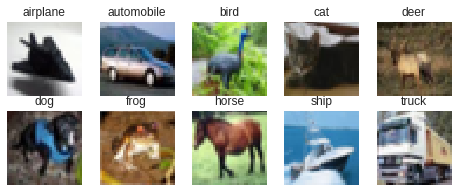

In [6]:
fig = plt.figure(figsize=(8,3))

for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0][0]
    image = x_train[idx]
    plt.imshow(image)

plt.show()

In [0]:
model_dl = Sequential()

model_dl.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    padding='same',
                    input_shape=x_train.shape[1:]))
model_dl.add(Activation('relu'))
model_dl.add(Conv2D(filters=32,
                    kernel_size=(3, 3)))
model_dl.add(Activation('relu'))
model_dl.add(MaxPooling2D(pool_size=(2, 2)))
model_dl.add(Dropout(0.25))

model_dl.add(Conv2D(filters=64,
                    kernel_size=(3, 3),
                    padding='same'))
model_dl.add(Activation('relu'))
model_dl.add(Conv2D(filters=64,
                    kernel_size=(3, 3)))
model_dl.add(Activation('relu'))
model_dl.add(MaxPooling2D(pool_size=(2, 2)))
model_dl.add(Dropout(0.25))

model_dl.add(Flatten())
model_dl.add(Dense(units=128))
model_dl.add(Activation('relu'))
model_dl.add(Dropout(0.5))
model_dl.add(Dense(units=10))
model_dl.add(Activation('softmax', name='out'))

In [62]:
model_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_24 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        18496     
__________

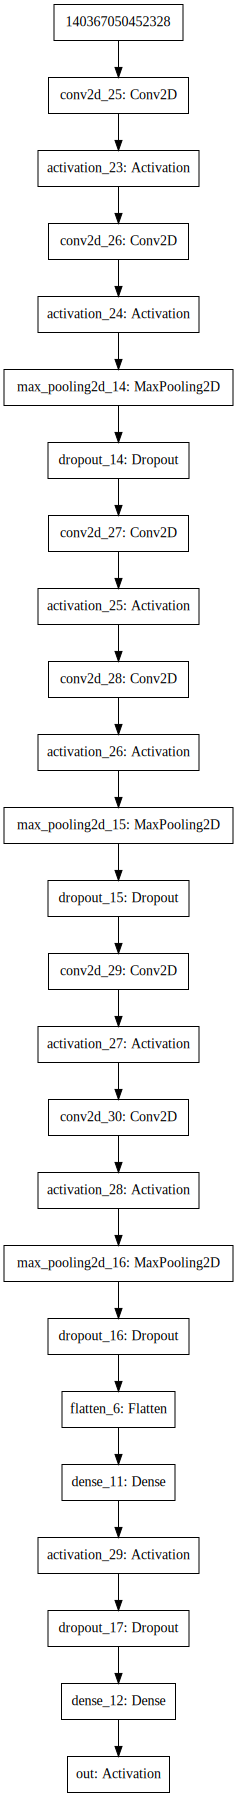

In [63]:
SVG(model_to_dot(model_dl).create(prog='dot', format='svg'))

In [0]:
opt = Adam(lr=0.0001)

model_dl.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics={'out': 'acc'})

In [1]:
history = model_dl.fit(
    x=x_train/255.,
    y=to_categorical(y_train, num_classes=10),
    batch_size=32,
    epochs=30,
    validation_data=(x_test/255., to_categorical(y_test, num_classes=10)),
    shuffle=True
)

NameError: ignored

In [66]:
preds_dl_train = model_dl.predict(x_train/255., verbose=1, batch_size=64)
preds_dl_test = model_dl.predict(x_test/255., verbose=1, batch_size=64)

10000/10000 [==============================] - 1s 107us/step


In [67]:
print('CNN train accuracy')
print(accuracy_score(y_train.flatten(), np.argmax(preds_dl_train, axis=1)))
print('')
print('CNN test accuracy')
print(accuracy_score(y_test.flatten(), np.argmax(preds_dl_test, axis=1)))

CNN train accuracy
0.83002

CNN test accuracy
0.7774


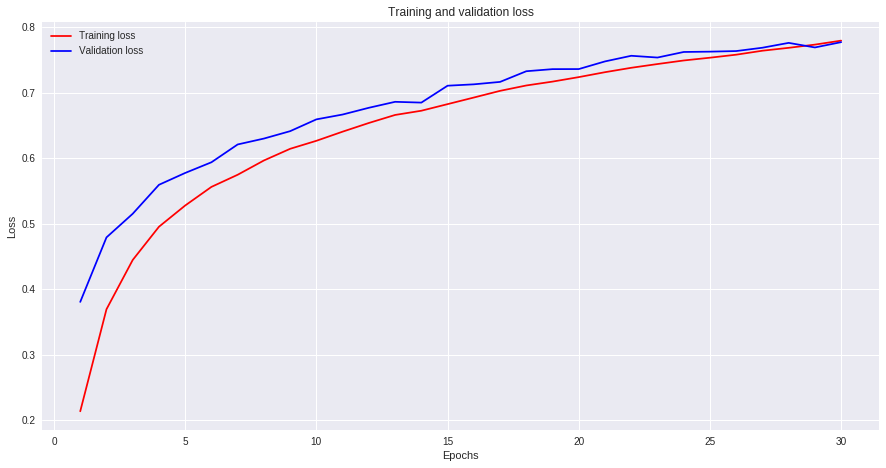

In [68]:
fig = plt.figure(figsize=(15,7.5))

epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['acc'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
!pip install mxnet-cu92

    100% |████████████████████████████████| 412.1MB 38kB/s 
    100% |████████████████████████████████| 61kB 21.8MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4


'/device:GPU:0'

In [69]:
from odata import ODataService
url = 'http://services.odata.org/V4/Northwind/Northwind.svc/'
Service = ODataService(url, reflect_entities=True)

ModuleNotFoundError: ignored

In [70]:
!pip install odata

  Could not find a version that satisfies the requirement odata (from versions: )
No matching distribution found for odata
